In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def plot_series(time, series, format='-', start=0, end=None, label=None):
  plt.plot(time[start:end], series[start:end], format, label=label)
  plt.xlabel('Time')
  plt.ylabel('Value')
  if label:
    plt.legend(fontsize=8)
  plt.grid(True)

def trend(time, slope=0):
  return time*slope

def seasonality_pattern(season_time):
  return np.where(season_time<0.4,
                  np.cos(season_time*2*np.pi),
                  1/np.exp(3*season_time))

def seasonality(time, period, amplitude=1, phase=0):
  season_time = ((time+phase)%period)/period
  return amplitude*seasonality_pattern(season_time)

def white_noise(time, noise_level=1, seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time))*noise_level

***Trend + Seasonality + White noise***

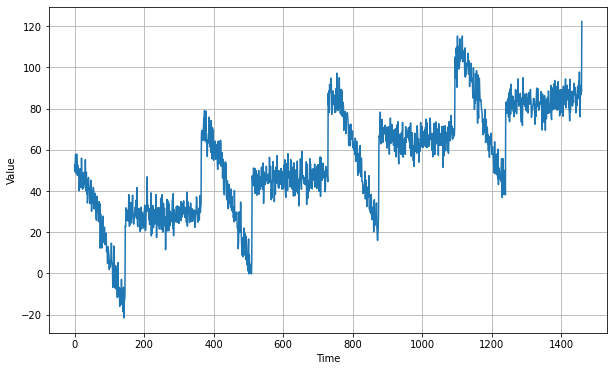

In [6]:
time = np.arange(4*365+1)
slope = 0.05
baseline = 10
amplitude = 40
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

noise_level = 5
noise = white_noise(time, noise_level, seed=42)

series += noise

plt.figure(figsize=(10,6))
plot_series(time, series)
plt.show()

In [7]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

**Naive Forecast**

Considers the previous day series and forecasts it

In [8]:
naive_forecast = series[split_time-1:-1]

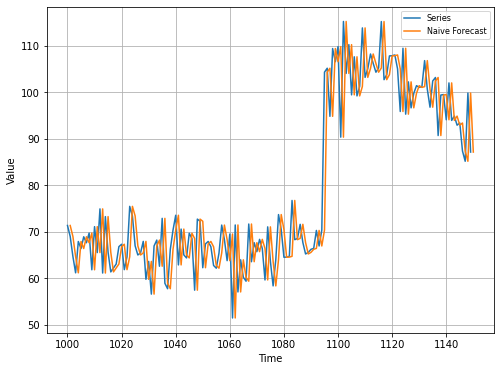

In [14]:
plt.figure(figsize=(8,6))
plot_series(time_valid, x_valid, start=0, end=150, label='Series')
plot_series(time_valid, naive_forecast, start=1, end=151, label='Naive Forecast')
plt.show()

***Evaluate***

In [16]:
import keras

In [18]:
keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy()

5.937908515321673

In [15]:
errors = naive_forecast - x_valid
abs_errors = np.abs(errors)
mae = abs_errors.mean()
mae

5.9379085153216735

**Moving Average**
<blockquote>Forecast = training moving average of differenced series + centered moving averageof past series (t-365)</blockquote>